In [97]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

In [40]:
from sklearn import datasets
from sklearn import manifold
from skimage.io import imshow

In [6]:
data=datasets.fetch_openml('mnist_784',version=1,return_X_y=True)

In [23]:
len(data)

2

In [24]:
pixel_values,targets=data

In [25]:
pixel_values.shape # images for each digit

(70000, 784)

In [26]:
pixel_values[0].shape

(784,)

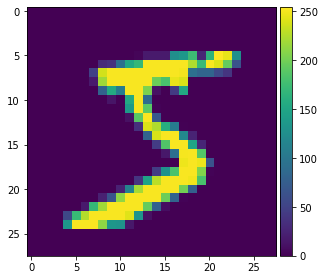

In [46]:
imshow(pixel_values[0].reshape(28,28))

In [104]:
pixel_values[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [48]:
images=pixel_values.reshape(-1,28,28)

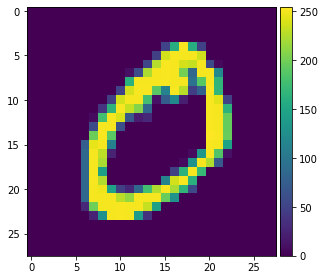

In [60]:
imshow(images[1])

In [61]:
targets.shape # 

(70000,)

In [62]:
targets = targets.astype(int)

## t-NSE algorithm by Sam Roweis and Geoffrey Hinton
t-NSE is a dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability. 

Each image is 2D in the `images` data set, reduce each of these images into a point in space, based on similarity of intensities.

In [76]:
tsne=manifold.TSNE(n_components=2,random_state=42)

In [110]:
images.shape

(70000, 28, 28)

In [90]:
pixels=pixel_values[:3000]

In [111]:
targets=targets[:3000]

In [91]:
transformed_data=tsne.fit_transform(pixels)

In [92]:
transformed_data.shape

(3000, 2)

In [93]:
targets

array([5, 0, 4, ..., 9, 1, 5])

In [113]:
transformed_data=np.column_stack([transformed_data,targets])

In [114]:
transformed_df=pd.DataFrame(train,columns=['x','y','targets'])

In [115]:
transformed_df.head()

,x,y,targets
0,-5.281551,-28.952768,5.0
1,-26.105896,-68.069321,0.0
2,-42.503582,35.580391,4.0
3,38.893967,26.663395,1.0
4,-14.770573,35.433247,9.0


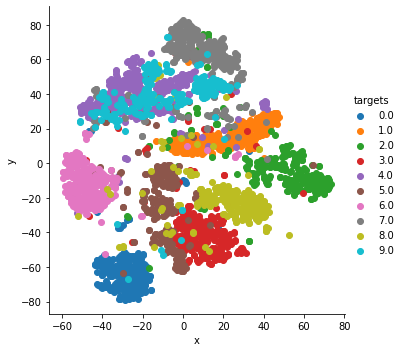

In [116]:
grid=sns.FacetGrid(transformed_df,hue='targets',height=5)
grid.map(plt.scatter,'x','y').add_legend()

So we essentially clustered the data. 